In [1]:
# importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


# setting master path
path = r'/Users/Norberto/Desktop/2023-10 Instacart Basket Analysis'

# setting pandas option
pd.set_option('display.max_columns',None)

In [2]:
# read pkl file
ords_prods_df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_final.pkl'))

In [ ]:
# establish 'seed' to make random sample reproducible
np.random.seed(4)

# create random value for each row in df and assign True or False based on the comparison to 0.7
dev = np.random.rand(len(ords_prods_df)) <= 0.7

# two df. one big with rows greater than .7 and one with rows less than .7
big = ords_prods_df[dev]
small = ords_prods_df[~dev]

In [3]:
ords_prods_df

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_day_new,busiest_period_of_day,max_order,loyalty_flag,avg_spending,spending_flag,dspo_median,order_frequency_flag,gender,state,age,num_depend,fam_status,income,region,activity_flag,age_group,income_group,depend_group,cust_prof,has_pets?,has_babies?,drinks_alcohol?
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,High Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,NaN,Middle-Aged,Middle Income,Parent,Middle-Aged Middle Income Parent,NaN,NaN,NaN
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,High Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,NaN,Middle-Aged,Middle Income,Parent,Middle-Aged Middle Income Parent,NaN,NaN,NaN
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,High Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,NaN,Middle-Aged,Middle Income,Parent,Middle-Aged Middle Income Parent,NaN,NaN,NaN
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,High Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,NaN,Middle-Aged,Middle Income,Parent,Middle-Aged Middle Income Parent,NaN,NaN,NaN
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,High Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,NaN,Middle-Aged,Middle Income,Parent,Middle-Aged Middle Income Parent,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,452589,206193,41,0,15,3.0,35921,17,1,Organic Large Grade A Brown Eggs,86.0,16.0,6.9,Mid-range product,Busiest day,Busiest days,Most orders,41,Loyal customer,7.538484,High Spender,4.0,Frequent customer,Female,Wyoming,41,0,single,70597,West,NaN,Middle-Aged,Middle Income,Adult,Middle-Aged Middle Income Adult,NaN,NaN,NaN
32404855,452589,206193,41,0,15,3.0,13988,18,0,Snow Peas,83.0,4.0,6.7,Mid-range product,Busiest day,Busiest days,Most orders,41,Loyal customer,7.538484,High Spender,4.0,Frequent customer,Female,Wyoming,41,0,single,70597,West,NaN,Middle-Aged,Middle Income,Adult,Middle-Aged Middle Income Adult,NaN,NaN,NaN
32404856,452589,206193,41,0,15,3.0,26629,19,0,Cherry Pie Fruit & Nut Bar,3.0,19.0,4.0,Low-range product,Busiest day,Busiest days,Most orders,41,Loyal customer,7.538484,High Spender,4.0,Frequent customer,Female,Wyoming,41,0,single,70597,West,NaN,Middle-Aged,Middle Income,Adult,Middle-Aged Middle Income Adult,NaN,NaN,NaN
32404857,452589,206193,41,0,15,3.0,21914,20,0,Peanut Butter & Jelly Fruit & Nut Food Bar,3.0,19.0,1.9,Low-range product,Busiest day,Busiest days,Most orders,41,Loyal customer,7.538484,High Spender,4.0,Frequent customer,Female,Wyoming,41,0,single,70597,West,NaN,Middle-Aged,Middle Income,Adult,Middle-Aged Middle Income Adult,NaN,NaN,NaN


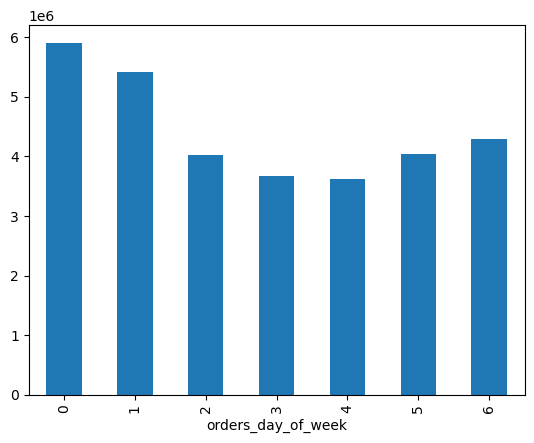

In [4]:
bar = ords_prods_df['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [5]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

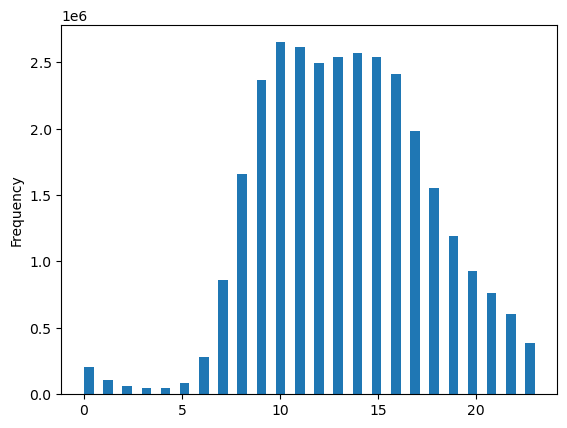

In [6]:
hist = ords_prods_df['order_hour_of_day'].plot.hist(bins = 47)

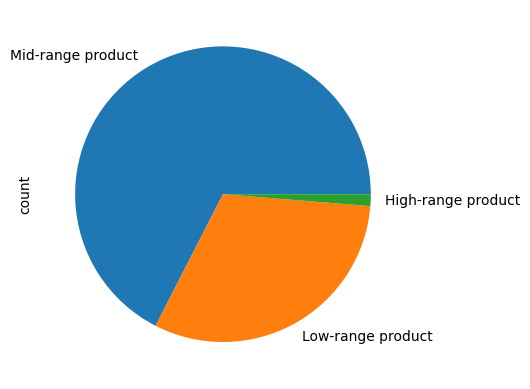

In [10]:
pie = ords_prods_df['price_range_loc'].value_counts().plot(kind='pie',subplots=True)

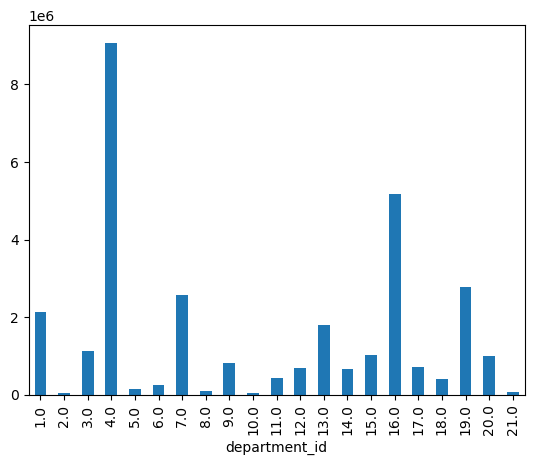

In [11]:
bar = ords_prods_df['department_id'].value_counts().sort_index().plot.bar()

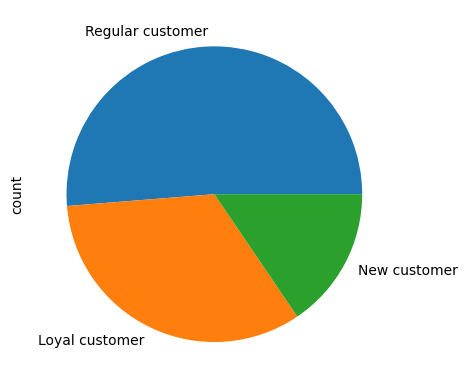

In [12]:
pie = ords_prods_df['loyalty_flag'].value_counts().plot(kind='pie',subplots=True)

In [14]:
ct = pd.crosstab(ords_prods_df['loyalty_flag'], ords_prods_df['orders_day_of_week'], dropna = False)
ct

orders_day_of_week,0,1,2,3,4,5,6
loyalty_flag,,,,,,,
Loyal customer,1754731,1843401,1352343,1266495,1292042,1456715,1318366
New customer,984879,818902,625288,560418,535931,587718,690559
Regular customer,3169000,2749383,2047075,1842622,1797021,1989296,2282379


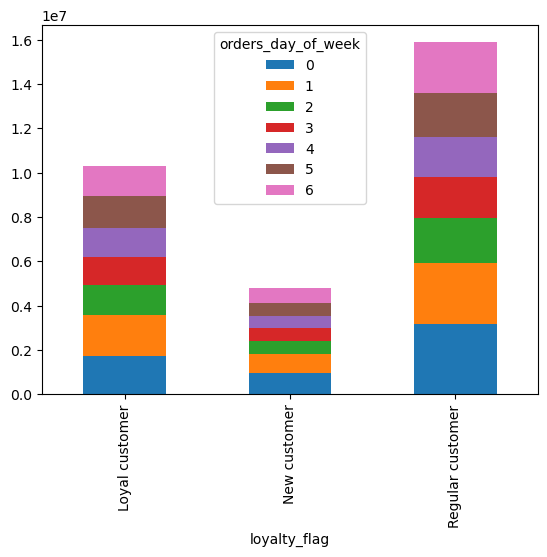

In [18]:
bar100 = ct.plot(kind='bar',stacked=True)

In [19]:
stacked_data = ct.apply(lambda x: x*100/sum(x), axis=1)

<Axes: xlabel='loyalty_flag'>

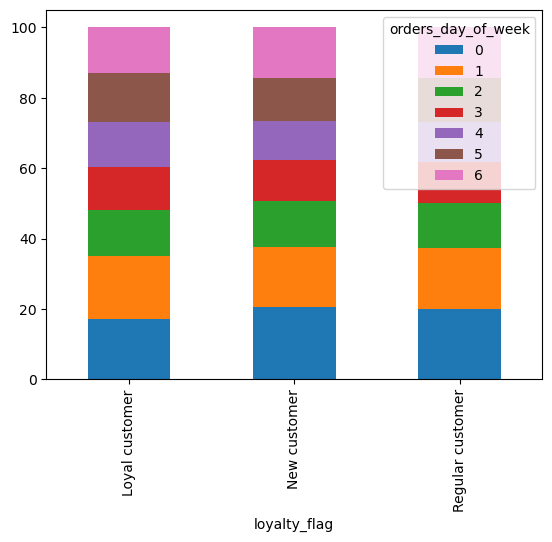

In [22]:
stacked_data.plot(kind="bar", stacked=True)

<Axes: xlabel='loyalty_flag'>

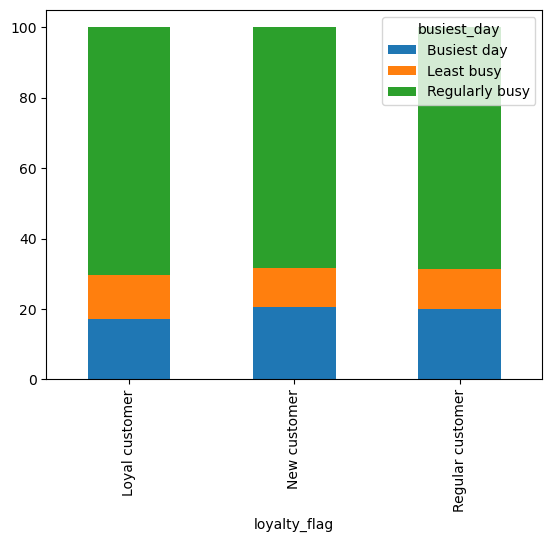

In [23]:
ct = pd.crosstab(ords_prods_df['loyalty_flag'], ords_prods_df['busiest_day'], dropna = False)
stacked_data = ct.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True)

<Axes: xlabel='order_hour_of_day'>

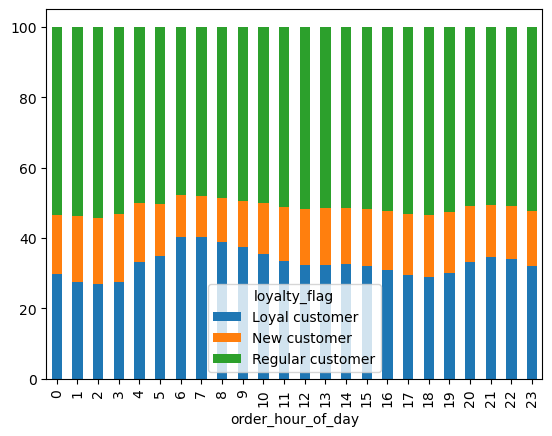

In [25]:
ct = pd.crosstab(ords_prods_df['order_hour_of_day'], ords_prods_df['loyalty_flag'], dropna = False)
stacked_data = ct.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True)

<Axes: xlabel='order_hour_of_day'>

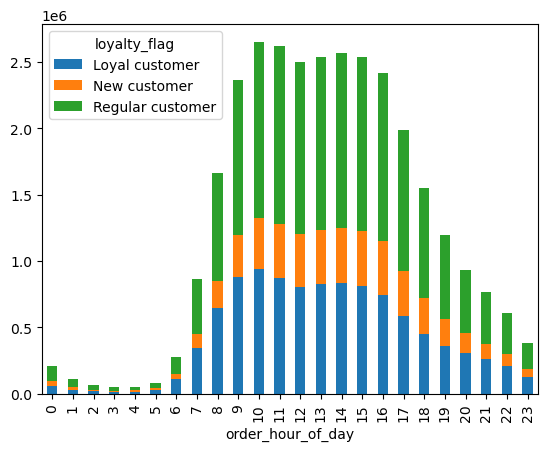

In [26]:
ct = pd.crosstab(ords_prods_df['order_hour_of_day'], ords_prods_df['loyalty_flag'], dropna = False)
ct.plot(kind="bar", stacked=True)

In [27]:
ords_prods_df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_day_new', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_spending', 'spending_flag', 'dspo_median', 'order_frequency_flag',
       'gender', 'state', 'age', 'num_depend', 'fam_status', 'income',
       'region', 'activity_flag', 'age_group', 'income_group', 'depend_group',
       'cust_prof', 'has_pets?', 'has_babies?', 'drinks_alcohol?'],
      dtype='object')

<Axes: xlabel='department_id'>

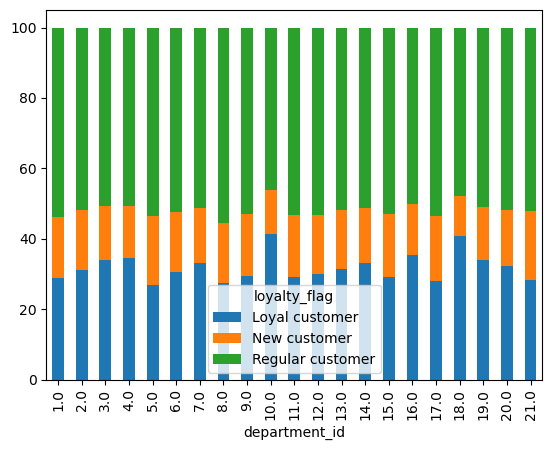

In [28]:
ct = pd.crosstab(ords_prods_df['department_id'], ords_prods_df['loyalty_flag'], dropna = False)
stacked_data = ct.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True)

In [29]:
dep_df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))
dep_df

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [30]:
stacked_data

loyalty_flag,Loyal customer,New customer,Regular customer
department_id,,,
1.0,28.724659,17.545627,53.729714
2.0,31.138299,16.968411,51.893290
3.0,33.892176,15.355077,50.752747
4.0,34.665507,14.721487,50.613006
5.0,26.774392,19.795059,53.430549
6.0,30.623733,17.125993,52.250274
7.0,33.244553,15.422405,51.333041
8.0,27.368364,17.064260,55.567376
9.0,29.506067,17.617037,52.876896


In [38]:
ct = pd.crosstab(ords_prods_df['region'], ords_prods_df['busiest_day'], dropna = False)


<Axes: xlabel='region'>

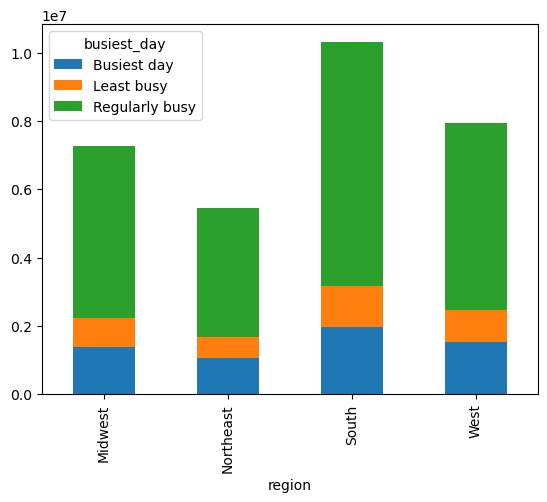

In [39]:
ct.plot(kind="bar", stacked=True)

<Axes: xlabel='department_id'>

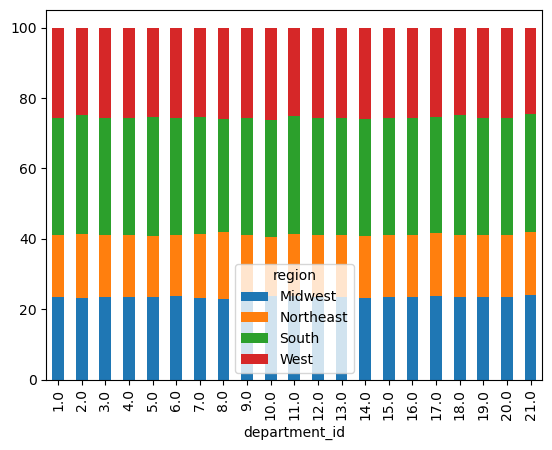

In [40]:
ct = pd.crosstab(ords_prods_df['department_id'], ords_prods_df['region'], dropna = False)
stacked_data = ct.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True)

array([<Axes: xlabel='order_hour_of_day'>,
       <Axes: xlabel='order_hour_of_day'>,
       <Axes: xlabel='order_hour_of_day'>], dtype=object)

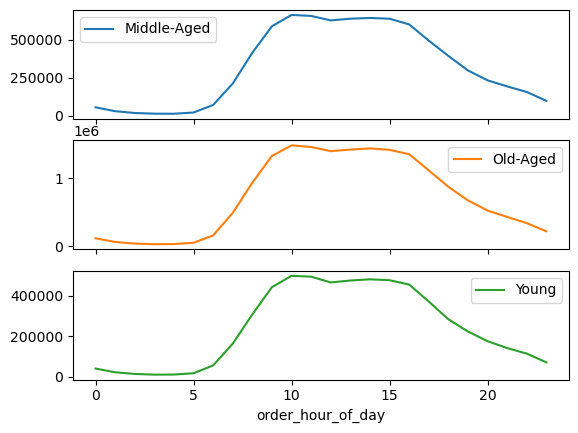

In [108]:
ct = pd.crosstab(ords_prods_df['order_hour_of_day'], ords_prods_df['age_group'], dropna = False)
ct.plot(kind="line",subplots=True)

<Axes: xlabel='department_id'>

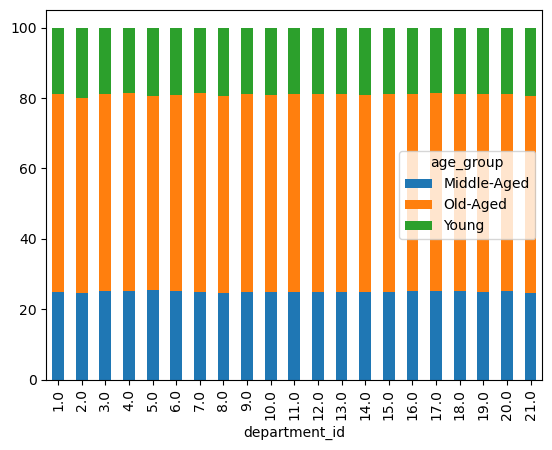

In [81]:
ct = pd.crosstab(ords_prods_df['department_id'], ords_prods_df['age_group'], dropna = False)
stacked_data = ct.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True)

<Axes: xlabel='department_id'>

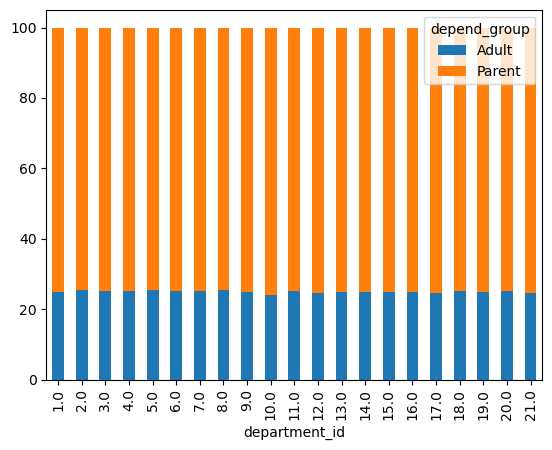

In [82]:
ct = pd.crosstab(ords_prods_df['department_id'], ords_prods_df['depend_group'], dropna = False)
stacked_data = ct.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True)

array([<Axes: xlabel='order_hour_of_day'>,
       <Axes: xlabel='order_hour_of_day'>], dtype=object)

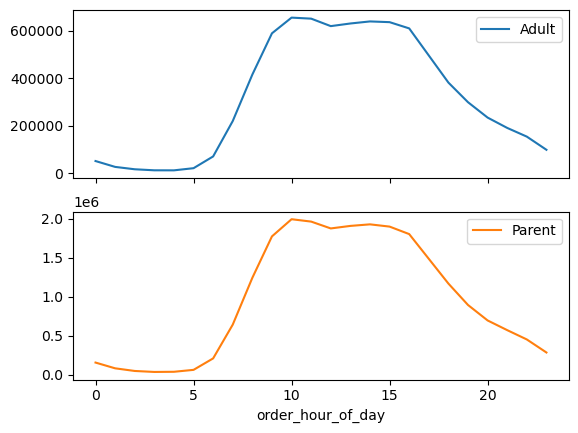

In [109]:
ct = pd.crosstab(ords_prods_df['order_hour_of_day'], ords_prods_df['depend_group'], dropna = False)
ct.plot(kind="line",subplots=True)

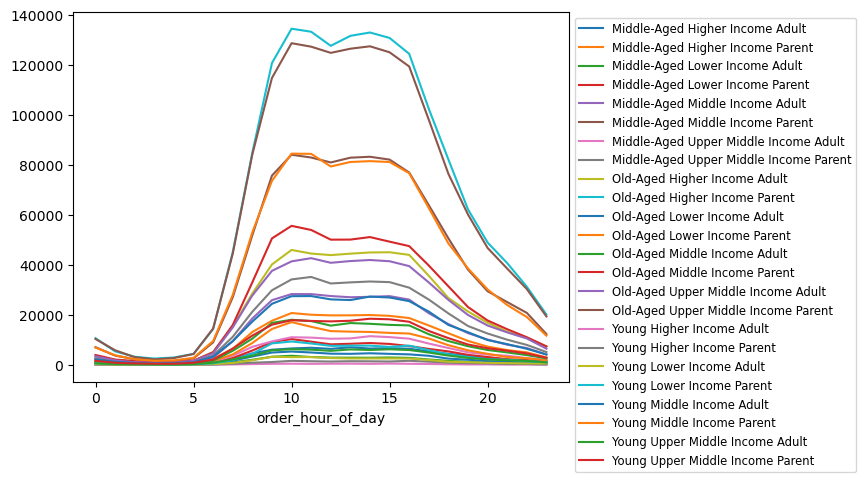

In [99]:
ct = pd.crosstab(small['order_hour_of_day'], small['cust_prof'], dropna = False)
ct.plot(kind="line").legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')


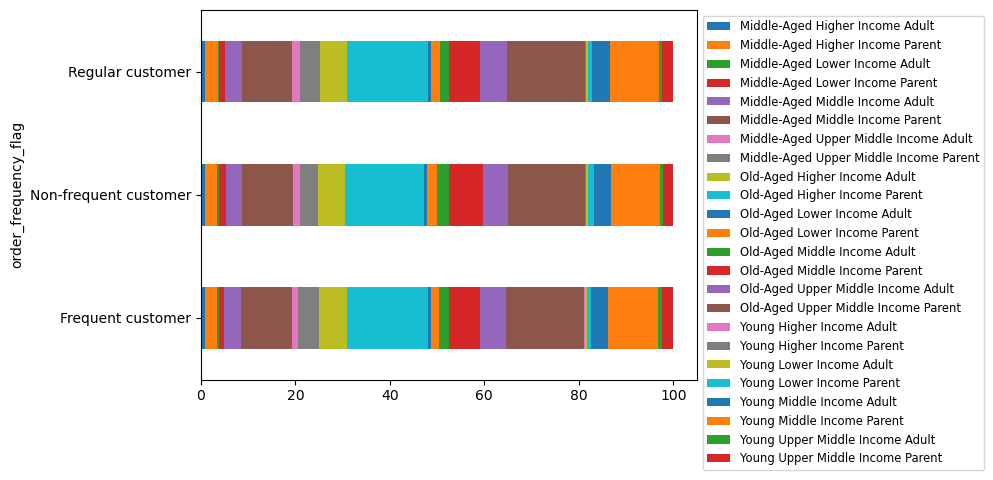

In [105]:
ct = pd.crosstab(small['order_frequency_flag'], small['cust_prof'], dropna = False)
stacked_data = ct.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="barh", stacked="True").legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')

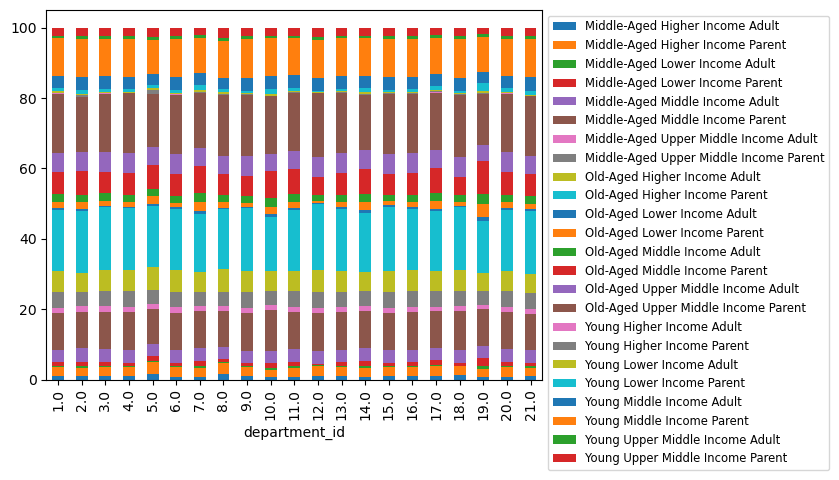

In [107]:
ct = pd.crosstab(small['department_id'], small['cust_prof'], dropna = False)
stacked_data = ct.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked="True").legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')

# SAMPLE

In [50]:
# establish 'seed' to make random sample reproducible
np.random.seed(4)

# create random value for each row in df and assign True or False based on the comparison to 0.7
dev = np.random.rand(len(ords_prods_df)) <= 0.7

# two df. one big with rows greater than .7 and one with rows less than .7
big = ords_prods_df[dev]
small = ords_prods_df[~dev]

<Axes: xlabel='depend_group'>

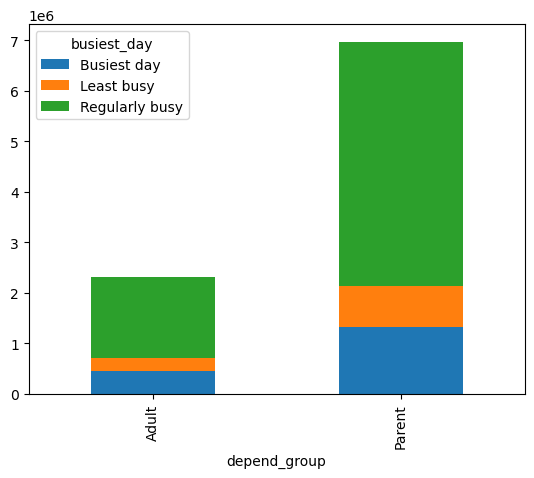

In [51]:
ct = pd.crosstab(small['depend_group'], small['busiest_day'], dropna = False)
ct.plot(kind="bar", stacked=True)

<Axes: xlabel='busiest_day'>

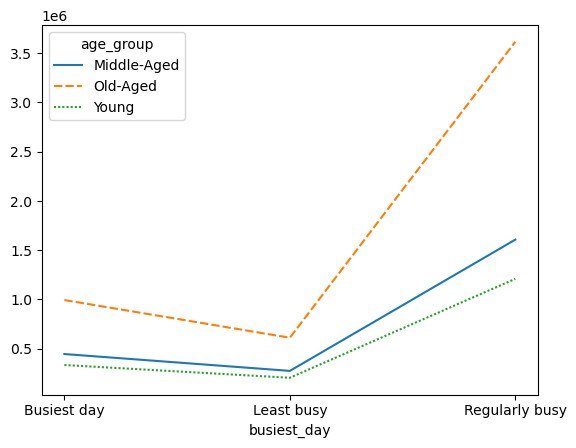

In [57]:
ct = pd.crosstab(small['busiest_day'], small['age_group'], dropna = False)
sns.lineplot(data = ct)

<Axes: xlabel='order_frequency_flag'>

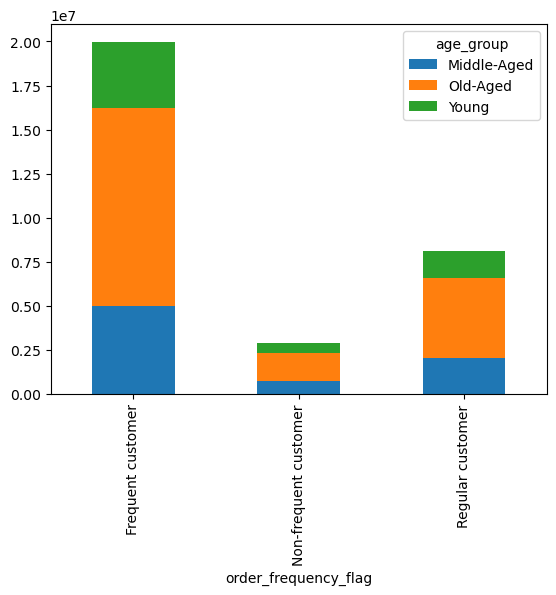

In [59]:
ct = pd.crosstab(ords_prods_df['order_frequency_flag'], ords_prods_df['age_group'], dropna = False)
ct.plot(kind="bar", stacked=True)

In [61]:
ct

age_group,Middle-Aged,Old-Aged,Young
order_frequency_flag,,,
Frequent customer,4995063,11208666,3760030
Non-frequent customer,718148,1636722,539792
Regular customer,2036243,4552119,1517781


<Axes: xlabel='order_hour_of_day'>

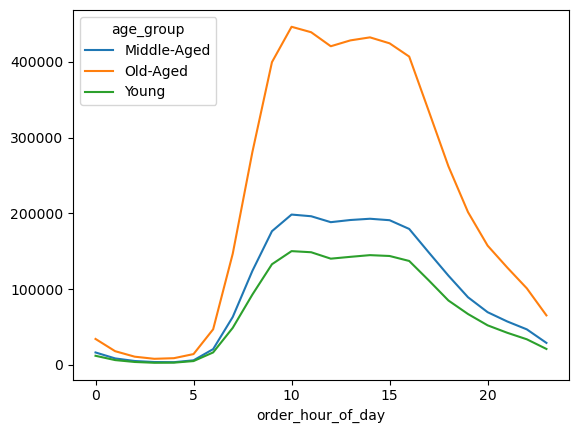

In [66]:
ct = pd.crosstab(small['order_hour_of_day'], small['age_group'], dropna = False)
ct.plot()

<Axes: xlabel='order_hour_of_day'>

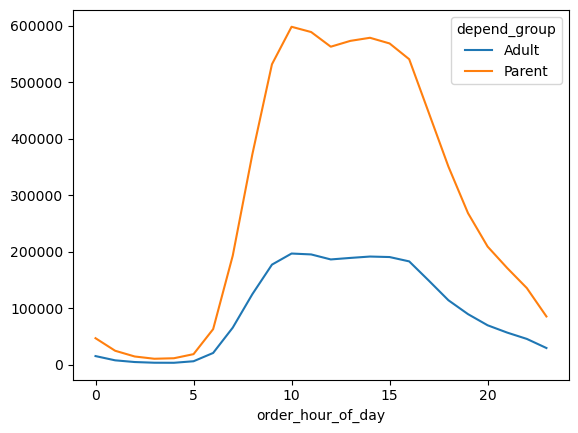

In [67]:
ct = pd.crosstab(small['order_hour_of_day'], small['depend_group'], dropna = False)
ct.plot()

In [75]:
df=small.groupby(['age_group','depend_group'])

In [77]:
df.describe()

order_id                                     \
                              count          mean            std   min   
age_group   depend_group                                                 
Middle-Aged Adult          580731.0  1.711642e+06  986232.632372   9.0   
            Parent        1743943.0  1.712373e+06  988755.738577   3.0   
Old-Aged    Adult         1305991.0  1.712561e+06  987824.828172  14.0   
            Parent        3912553.0  1.707979e+06  987110.345226   2.0   
Young       Adult          434853.0  1.714361e+06  987604.471288   8.0   
            Parent        1310397.0  1.706570e+06  987077.683126  12.0   

                                                                     \
                               25%        50%        75%        max   
age_group   depend_group                                              
Middle-Aged Adult         859246.5  1714273.0  2564370.0  3421055.0   
            Parent        854611.0  1714850.0  2567596.5  3421081.0   
Old-Aged    Adult         860043.0  1713076.0  2569173.0  3421080.0   
            Parent        852676.0  1707927.0  2562330.0  3421083.0   
Young       Adult         864554.0  1710701.0  2570805.0  3421077.0   
            Parent        850862.0  1704599.0  2561114.0  3421064.0   

                         order_number                                        \
                                count       mean        std  min  25%   50%   
age_group   depend_group                                                      
Middle-Aged Adult            580731.0  17.853056  17.758526  1.0  5.0  12.0   
            Parent          1743943.0  17.869223  17.640382  1.0  5.0  12.0   
Old-Aged    Adult           1305991.0  18.109828  17.962636  1.0  5.0  12.0   
            Parent          3912553.0  17.737213  17.549664  1.0  5.0  12.0   
Young       Adult            434853.0  17.665172  17.557346  1.0  5.0  12.0   
            Parent          1310397.0  17.836473  17.530921  1.0  5.0  12.0   

                                     orders_day_of_week                      \
                           75%   max              count      mean       std   
age_group   depend_group                                                      
Middle-Aged Adult         25.0  99.0           580731.0  2.733005  2.080972   
            Parent        25.0  99.0          1743943.0  2.730870  2.088604   
Old-Aged    Adult         25.0  99.0          1305991.0  2.743072  2.090898   
            Parent        25.0  99.0          3912553.0  2.748184  2.089579   
Young       Adult         24.0  99.0           434853.0  2.728333  2.085246   
            Parent        25.0  99.0          1310397.0  2.747441  2.093427   

                                                  order_hour_of_day  \
                          min  25%  50%  75%  max             count   
age_group   depend_group                                              
Middle-Aged Adult         0.0  1.0  3.0  5.0  6.0          580731.0   
            Parent        0.0  1.0  3.0  5.0  6.0         1743943.0   
Old-Aged    Adult         0.0  1.0  3.0  5.0  6.0         1305991.0   
            Parent        0.0  1.0  3.0  5.0  6.0         3912553.0   
Young       Adult         0.0  1.0  3.0  5.0  6.0          434853.0   
            Parent        0.0  1.0  3.0  5.0  6.0         1310397.0   

                                                                            \
                               mean       std  min   25%   50%   75%   max   
age_group   depend_group                                                     
Middle-Aged Adult         13.397260  4.260510  0.0  10.0  13.0  16.0  23.0   
            Parent        13.424354  4.258718  0.0  10.0  13.0  16.0  23.0   
Old-Aged    Adult         13.428355  4.256210  0.0  10.0  13.0  16.0  23.0   
            Parent        13.406560  4.243279  0.0  10.0  13.0  16.0  23.0   
Young       Adult         13.400317  4.255239  0.0  10.0  13.0  16.0  23.0   
            Parent        13.382